# Maximización de beneficios de una empresa de venta online con Muestreo de Thompson

### Importar las librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

### Configuración de los parámetros

In [2]:
N = 10000 # rondas
d = 9 # Número de estrategias

### Creación de la simulación

In [3]:
conversion_rates = [0.05, 0.13, 0.09, 0.16, 0.11, 0.04, 0.20, 0.08, 0.01]
X = np.array(np.zeros([N, d]))

for i in range(N):
  for j in range(d):
    if np.random.rand() <= conversion_rates[j]:
      X[i,j] = 1

In [4]:
X

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Implementación de la selección aleatoria y el muestreo de Thompson

In [5]:
strategies_selected_rs = [] # Resultados seleccionados con selección aleatoria
strategies_selected_ts = [] # Resultados seleccionados del muestreo de Thompson
total_reward_rs = 0
total_reward_ts = 0
number_of_rewards_1 = [0] * d # Cuantas veces la recompesa i-esima recibe una recompensa igual a 1
number_of_rewards_0 = [0] * d # Cuantas veces la recompesa i-esima recibe una recompensa igual a 0

for n in range(N):
  # Selección aleatoria
  strategy_rs = random.randrange(d) # Estrategia seleccionada de manera aleatoria
  strategies_selected_rs.append(strategy_rs) 
  reward_rs = X[n, strategy_rs]
  total_reward_rs += reward_rs

  # Muestreo de Thompson
  strategy_ts = 0
  max_random = 0
  for i in range(d):
    # Paso 1
    random_beta = random.betavariate(number_of_rewards_1[i] + 1, 
                                     number_of_rewards_0[i] + 1) # La selección sigue la distribución beta
    # Paso 2
    if random_beta > max_random:
      max_random = random_beta
      strategy_ts = i

  # Paso 3  
  reward_ts = X[n, strategy_ts]
  if reward_ts == 1:
    number_of_rewards_1[strategy_ts] += 1
  else:
    number_of_rewards_0[strategy_ts] += 1
  
  strategies_selected_ts.append(strategy_ts)
  total_reward_ts += reward_ts


### Calcular el retorno relativo y absoluto

In [6]:
absolute_return = (total_reward_ts - total_reward_rs) * 100
relative_return = (total_reward_ts - total_reward_rs) / total_reward_rs * 100
print('Rendimiento absoluto: {:.0f} $'.format(absolute_return))
print('Rendimiento relativo: {:.0f} %'.format(relative_return))

Rendimiento absoluto: 90600 $
Rendimiento relativo: 91 %


### Representación del histograma de selecciones

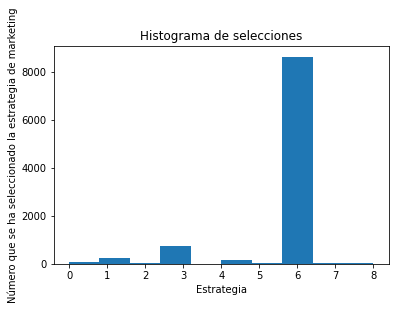

In [7]:
plt.hist(strategies_selected_ts)
plt.title('Histograma de selecciones')
plt.xlabel('Estrategia')
plt.ylabel('Número que se ha seleccionado la estrategia de marketing')
plt.show()